# 1.0 Notebook Setup

In [1]:
import os

from simulator_noturn import Simulator

# os.chdir("..")

import time 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches


import warnings
warnings.filterwarnings("ignore", message="divide by zero encountered in divide")
warnings.filterwarnings("ignore", message="overflow encountered in divide")


/Users/rachael/miniconda3/envs/darts/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Run Simulation

def run_simulation(sim, iterations,starting_state):
    simulation_paths = []
    start = time.time()

    for iter in range(iterations):
        if iter % 10000 == 0 and iter > 0:
            print(f"Ran {iter} iterations",'-',f"{time.time()-start:.3f}s")
        simulation_paths.append(sim.simulate_game(starting_state))

    print(f"Ran in {time.time()-start:.3f}s.")

    return simulation_paths

In [3]:
# Build Dataset 

def build_dataset(simulation_paths,player_num,epsilon,tokens):
    data_list = []
    data_cols = ['player','epsilon','tokens','game_id','throw_number','state','state_score','state_tokens']

    for game in range(len(simulation_paths)):

        for throw in range(len(simulation_paths[game])):

            data_list.append([player_num,epsilon,tokens,game,throw,simulation_paths[game][throw],simulation_paths[game][throw][0],simulation_paths[game][throw][1]])

    df = pd.DataFrame(data_list,columns=data_cols)

    return df 

# 2.0 Sanity Checks

In [5]:
#Sanity Check - expected # throws for e=1 and t=0 should be ~15.85 

iterations = 10000
player_num = 10
epsilon = 1
tokens = 0
starting_state = (501,tokens)

sim = Simulator(player_num, epsilon)
simulation_paths = run_simulation(sim,iterations,starting_state)
df = build_dataset(simulation_paths,player_num,epsilon,tokens)


df.groupby('game_id').count().player.mean() - 1

load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 4.556s.


15.845199999999998

In [6]:
# Tester 

iterations = 10000
player_num = 10
epsilon = 7
tokens = 0
starting_state = (501,tokens)


sim = Simulator(player_num, epsilon)
simulation_paths = run_simulation(sim,iterations,starting_state)
df = build_dataset(simulation_paths,player_num,epsilon,tokens)


df.groupby('game_id').count().player.mean() - 1

load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e7_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 10.405s.


37.1531

# 3.0 Distribution Exploration

## 3.1 Single Distributions

In [14]:
import statistics
import math
import pandas as pd
import numpy as np


# Plotting

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm, colors

def color_map_color(value, cmap_name='Wistia', vmin=0, vmax=1):
    # norm = plt.Normalize(vmin, vmax)
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = colors.rgb2hex(rgb)
    return color

In [34]:
# Initialize Parameters 

iterations = 10000
player_num = 10
tokens = 0
epsilon_list = [1,2,3,4,5,6,7,8,9]
starting_state = (501,tokens)

col_names = ['player','epsilon','tokens','game_id','throw_number','state','state_score','state_tokens']
df = pd.DataFrame(columns=col_names)

for epsilon in epsilon_list:
    
    sim = Simulator(player_num=player_num,epsilon=epsilon)
    simulation_paths = run_simulation(sim,iterations,starting_state)
    df = pd.concat([df,build_dataset(simulation_paths,player_num,epsilon,tokens)])
    df = df.reset_index().drop(['index'],axis=1)
    


load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 4.353s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 5.941s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e3_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 7.159s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e4_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 8.28

In [35]:
df_sim = df.groupby(['epsilon','tokens','game_id']).max().throw_number.reset_index()
df_sim.columns = ['epsilon','credits','game','throws']
df_sim = df_sim[['epsilon','credits','throws']]



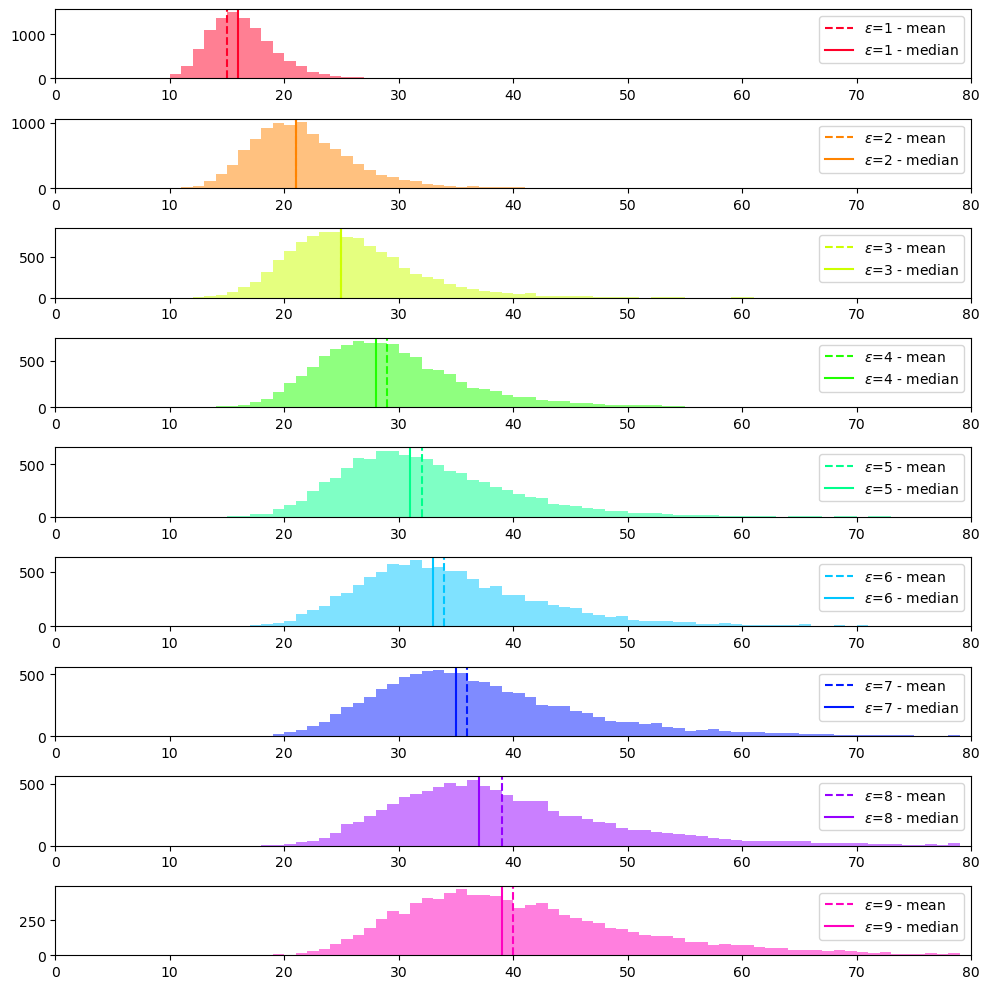

In [52]:
xmin=0
xmax=80

fig, ax = plt.subplots(9, figsize=(10,10))

vmax=max(epsilon_list)
vmin=min(epsilon_list)

handicap_list = ['spot_point_heuristic','spot_point_optimal','dynamic_credits']

row = 0 

for e1 in epsilon_list:

    # Extract data and colors 
    data1 = df_sim.loc[df_sim.epsilon==e1].throws.values
    color1 = color_map_color(e1, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

    # Plot baseline 
    ax[row].hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(1,80)))
    ax[row].axvline(statistics.mean(data1),color=color1,linestyle='dashed')
    ax[row].axvline(statistics.median(data1),color=color1)
        
    ax[row].set_xlim((xmin,xmax))

    ax[row].legend([f'$\epsilon$={e1} - mean',f'$\epsilon$={e1} - median'])

    row = row + 1 

# fig.suptitle(f"Distributions for stronger player with $\epsilon$= {e1}")
# ax[0,0].title.set_text('No Handicap')
# ax[0,1].title.set_text('Hueristic Spot Point')
# ax[0,2].title.set_text('Optimized Spot Point')
# ax[0,3].title.set_text('Dynamic Credits')
fig.tight_layout()

In [171]:
from scipy.stats import norm, lognorm, gamma, poisson

In [ ]:
xmin=0
xmax=80

fig, ax = plt.subplots(9, figsize=(10,10))

vmax=max(epsilon_list)
vmin=min(epsilon_list)

handicap_list = ['spot_point_heuristic','spot_point_optimal','dynamic_credits']

row = 0 

for e1 in epsilon_list:

    # Extract data and colors 
    data1 = df_sim.loc[df_sim.epsilon==e1].throws.values
    color1 = color_map_color(e1, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

    # Plot baseline 
    ax[row].hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(1,80)))
    ax[row].axvline(statistics.mean(data1),color=color1,linestyle='dashed')
    ax[row].axvline(statistics.median(data1),color=color1)
        
    ax[row].set_xlim((xmin,xmax))

    ax[row].legend([f'$\epsilon$={e1} - mean',f'$\epsilon$={e1} - median'])

    row = row + 1 

# fig.suptitle(f"Distributions for stronger player with $\epsilon$= {e1}")
# ax[0,0].title.set_text('No Handicap')
# ax[0,1].title.set_text('Hueristic Spot Point')
# ax[0,2].title.set_text('Optimized Spot Point')
# ax[0,3].title.set_text('Dynamic Credits')
fig.tight_layout()

load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.612s.
Ran in 0.539s.


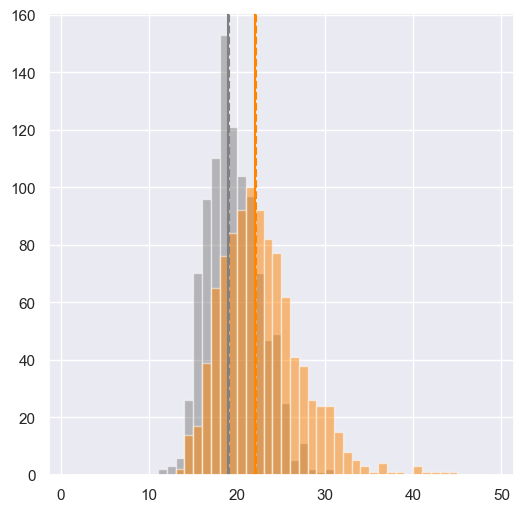

In [82]:
epsilon = 2
sim = Simulator(epsilon=epsilon)


data0 = [len(x) for x in run_simulation(sim,1000,(501,0))]
data1 = [len(x) for x in run_simulation(sim,1000,(501,1))]

color0 = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
color1 = 'grey' #color_map_color(e1, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)



plt.hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(1,50)))
plt.axvline(statistics.mean(data1),color=color1,linestyle='dashed')
plt.axvline(statistics.median(data1),color=color1)
plt.hist(np.array(data0),color=color0,alpha=0.5,bins=list(range(1,50)))
plt.axvline(statistics.mean(data0),color=color0,linestyle='dashed')
plt.axvline(statistics.median(data0),color=color0)



load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.598s.
Ran in 0.369s.


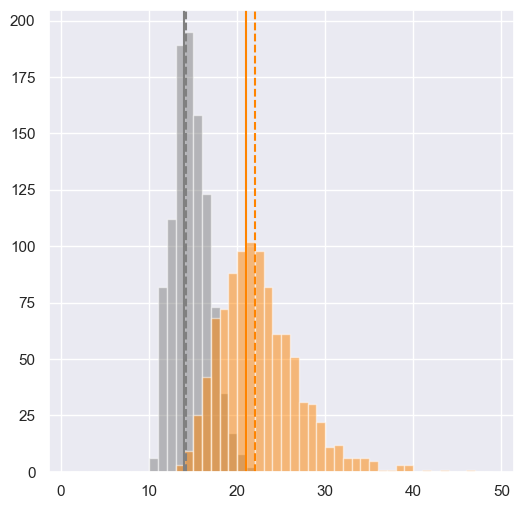

In [83]:
epsilon = 2
credits = 5
sim = Simulator(epsilon=epsilon)


data0 = [len(x) for x in run_simulation(sim,1000,(501,0))]
data1 = [len(x) for x in run_simulation(sim,1000,(501,credits))]

color0 = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
color1 = 'grey' #color_map_color(e1, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)



plt.hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(1,50)))
plt.axvline(statistics.mean(data1),color=color1,linestyle='dashed')
plt.axvline(statistics.median(data1),color=color1)
plt.hist(np.array(data0),color=color0,alpha=0.5,bins=list(range(1,50)))
plt.axvline(statistics.mean(data0),color=color0,linestyle='dashed')
plt.axvline(statistics.median(data0),color=color0)



## 3.2 Handicap Distributions

In [8]:
epsilon_list = [1,2,3,4,5,6,7,8,9]
player_num = 10

In [4]:
import handicap as hc
handicap = hc.Handicap(results_file_name='results/player10_noturn_results.csv')

In [17]:
sim_paths = {}
iterations = 1000

for e1 in epsilon_list:

    sim_paths[e1] = {}

    starting_state_1 = (501,0)
    
    # Baseline 
    sim = Simulator(player_num=player_num,epsilon=e1)
    sim_paths[e1]['baseline'] = run_simulation(sim,iterations,starting_state_1)

    for e0 in epsilon_list:
        
        if e1 <= e0:

            sim = Simulator(player_num=player_num,epsilon=e0)

            sim_paths[e1][e0] = {}

            spot_points_heuristic = handicap.get_spot_point_heuristic_handicap(e1,e0)
            spot_points_optimal = handicap.get_spot_point_optimal_handicap(e1,e0)
            credits, credits_lower, credits_higher, threshold_higher_multiplier = handicap.get_dynamic_credits_handicap(e1,e0)
            threshold_higher = int(round(iterations * threshold_higher_multiplier))

            sim_paths[e1][e0]['spot_point_heuristic'] = run_simulation(sim,iterations,(501-spot_points_heuristic,0))
            sim_paths[e1][e0]['spot_point_optimal'] = run_simulation(sim,iterations,(501-spot_points_optimal,0))
            sim_paths[e1][e0]['dynamic_credits'] = run_simulation(sim,threshold_higher,(501,credits_higher))
            sim_paths[e1][e0]['dynamic_credits'].extend(run_simulation(sim,iterations-threshold_higher,(501,credits_lower)))
            

load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.473s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.453s.
Ran in 0.463s.
Ran in 0.000s.
Ran in 0.453s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.479s.
Ran in 0.465s.
Ran in 0.365s.
Ran in 0.096s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e3_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_paramet

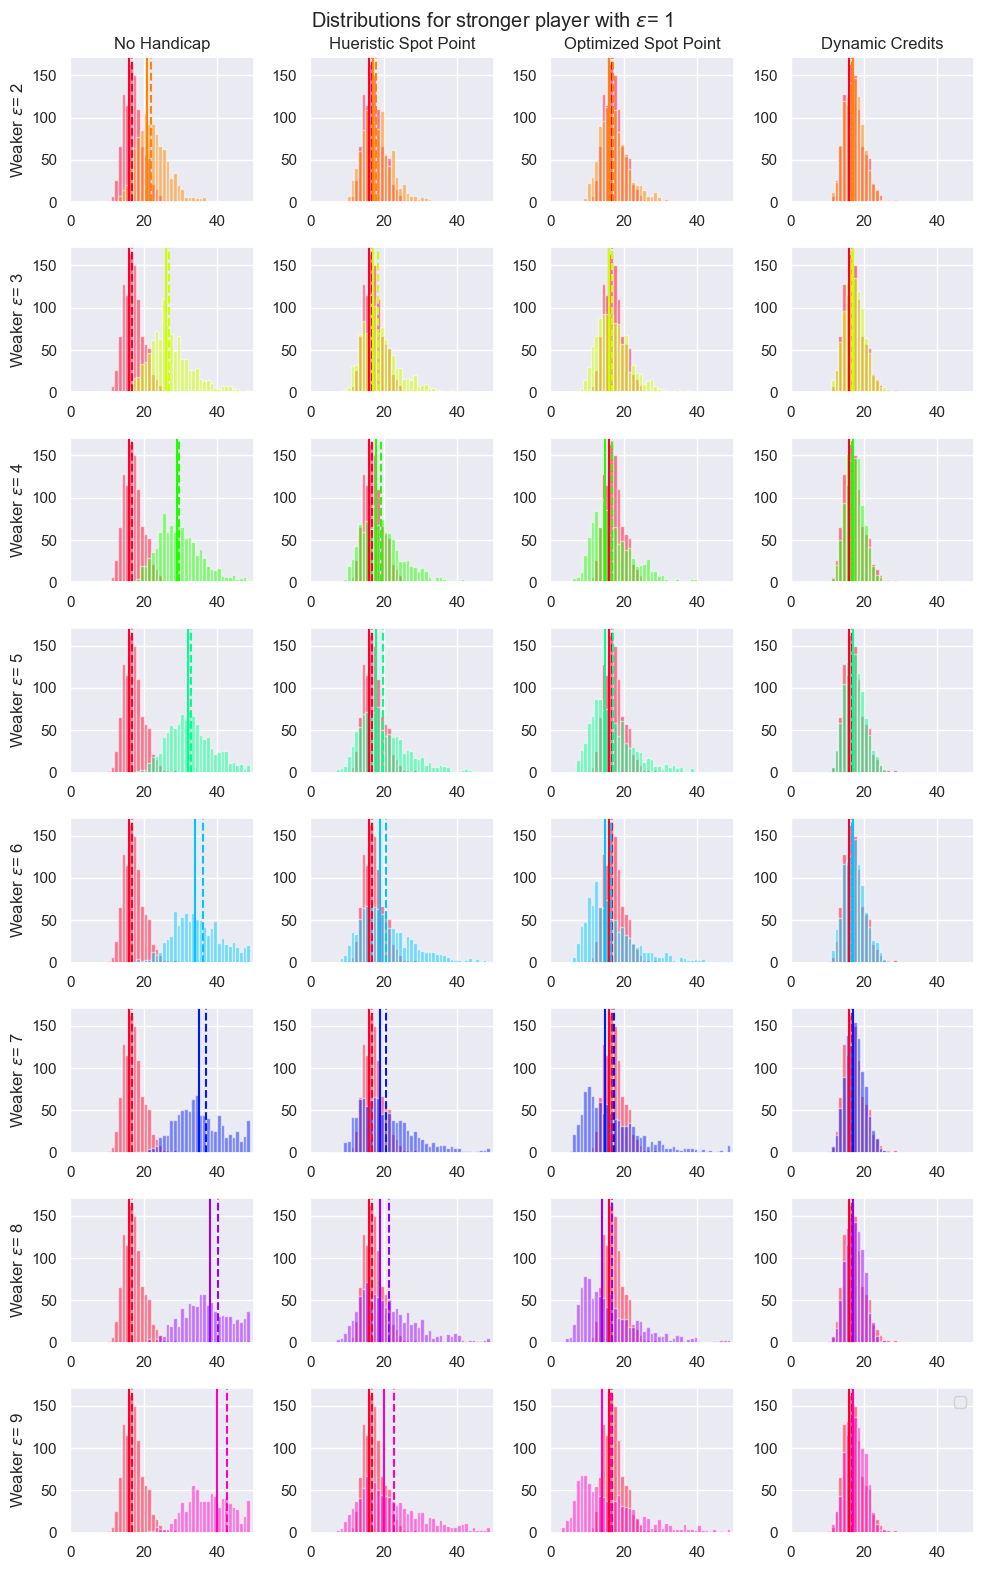

In [31]:
stronger_e = 1
xmin = 0
xmax = 50
num_rows = len(epsilon_list) - stronger_e

fig, ax = plt.subplots(num_rows, 4, figsize=(10,num_rows*2))

sim_lengths = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

handicap_list = ['spot_point_heuristic','spot_point_optimal','dynamic_credits']

row = 0 

for e1 in [stronger_e]:

    for e0 in epsilon_list:
        
        if e1 < e0:

            #print(f'Completed for {e1} and {e0}')

            # Extract data and colors 
            data1 = [len(x) for x in sim_paths[e1]['baseline']]
            data0 = [len(x) for x in sim_paths[e0]['baseline']]
            color1 = color_map_color(e1, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
            color0 = color_map_color(e0, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

            # Plot baseline 
            ax[row,0].hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(xmin,xmax)))
            ax[row,0].axvline(statistics.mean(data1),color=color1,linestyle='dashed')
            ax[row,0].axvline(statistics.median(data1),color=color1)
            ax[row,0].hist(np.array(data0),color=color0,alpha=0.5,bins=list(range(xmin,xmax)))
            ax[row,0].axvline(statistics.mean(data0),color=color0,linestyle='dashed')
            ax[row,0].axvline(statistics.median(data0),color=color0)
             
            ax[row,0].set_xlim((xmin,xmax))
            ax[row,0].set_ylabel(f'Weaker $\epsilon$= {e0}')  

            plt.legend([f'{e1} - mean',f'{e1} - median',f'{e0} - mean',f'{e0} - median'])
            
            # Plot handicaps 

            for j in range(len(handicap_list)):

                data0 = [len(x) for x in sim_paths[e1][e0][handicap_list[j]]]
                col = j+1 

                ax[row,col].hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(xmin,xmax)))
                ax[row,col].axvline(statistics.mean(data1),color=color1,linestyle='dashed')
                ax[row,col].axvline(statistics.median(data1),color=color1)
                ax[row,col].hist(np.array(data0),color=color0,alpha=0.5,bins=list(range(xmin,xmax)))
                ax[row,col].axvline(statistics.mean(data0),color=color0,linestyle='dashed')
                ax[row,col].axvline(statistics.median(data0),color=color0)
                
                ax[row,col].set_xlim((xmin,xmax))
                

            row = row + 1 

fig.suptitle(f"Distributions for stronger player with $\epsilon$= {e1}")
ax[0,0].title.set_text('No Handicap')
ax[0,1].title.set_text('Hueristic Spot Point')
ax[0,2].title.set_text('Optimized Spot Point')
ax[0,3].title.set_text('Dynamic Credits')
fig.tight_layout()



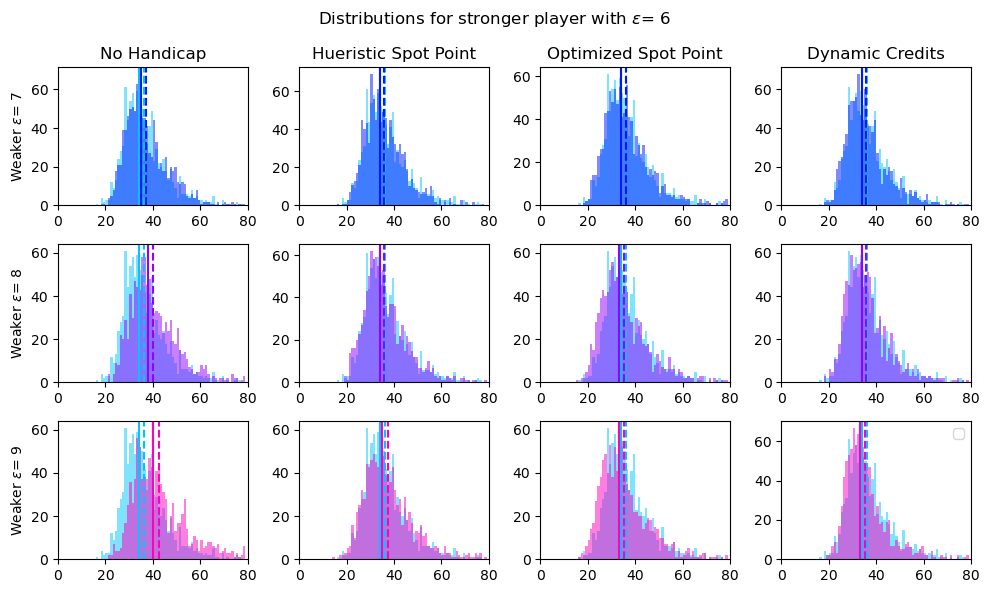

In [24]:
stronger_e = 6
xmin = 0
xmax = 80
num_rows = len(epsilon_list) - stronger_e

fig, ax = plt.subplots(num_rows, 4, figsize=(10,num_rows*2))

sim_lengths = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

handicap_list = ['spot_point_heuristic','spot_point_optimal','dynamic_credits']

row = 0 

for e1 in [stronger_e]:

    for e0 in epsilon_list:
        
        if e1 < e0:

            #print(f'Completed for {e1} and {e0}')

            # Extract data and colors 
            data1 = [len(x) for x in sim_paths[e1]['baseline']]
            data0 = [len(x) for x in sim_paths[e0]['baseline']]
            color1 = color_map_color(e1, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
            color0 = color_map_color(e0, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

            # Plot baseline 
            ax[row,0].hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(xmin,xmax)))
            ax[row,0].axvline(statistics.mean(data1),color=color1,linestyle='dashed')
            ax[row,0].axvline(statistics.median(data1),color=color1)
            ax[row,0].hist(np.array(data0),color=color0,alpha=0.5,bins=list(range(xmin,xmax)))
            ax[row,0].axvline(statistics.mean(data0),color=color0,linestyle='dashed')
            ax[row,0].axvline(statistics.median(data0),color=color0)
             
            ax[row,0].set_xlim((xmin,xmax))
            ax[row,0].set_ylabel(f'Weaker $\epsilon$= {e0}')  

            plt.legend([f'{e1} - mean',f'{e1} - median',f'{e0} - mean',f'{e0} - median'])
            
            # Plot handicaps 

            for j in range(len(handicap_list)):

                data0 = [len(x) for x in sim_paths[e1][e0][handicap_list[j]]]
                col = j+1 

                ax[row,col].hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(xmin,xmax)))
                ax[row,col].axvline(statistics.mean(data1),color=color1,linestyle='dashed')
                ax[row,col].axvline(statistics.median(data1),color=color1)
                ax[row,col].hist(np.array(data0),color=color0,alpha=0.5,bins=list(range(xmin,xmax)))
                ax[row,col].axvline(statistics.mean(data0),color=color0,linestyle='dashed')
                ax[row,col].axvline(statistics.median(data0),color=color0)
                
                ax[row,col].set_xlim((xmin,xmax))
                

            row = row + 1 

fig.suptitle(f"Distributions for stronger player with $\epsilon$= {e1}")
ax[0,0].title.set_text('No Handicap')
ax[0,1].title.set_text('Hueristic Spot Point')
ax[0,2].title.set_text('Optimized Spot Point')
ax[0,3].title.set_text('Dynamic Credits')
fig.tight_layout()



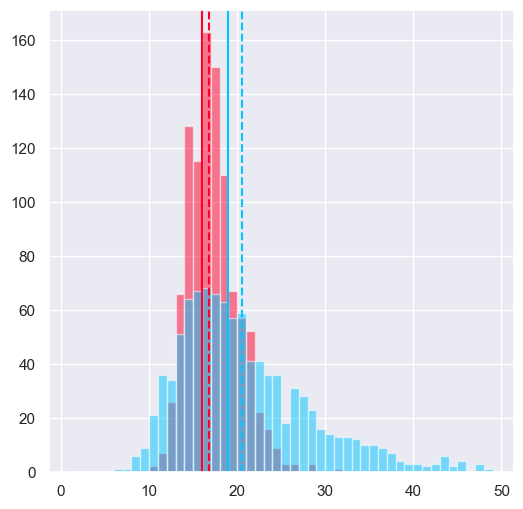

In [52]:
e1 = 1
e0 = 6
data0 = [len(x) for x in sim_paths[e1][e0]['spot_point_heuristic']]
data1 = [len(x) for x in sim_paths[e1]['baseline']]

color1 = color_map_color(e1, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
color0 = color_map_color(e0, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)


plt.hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(1,50)))
plt.axvline(statistics.mean(data1),color=color1,linestyle='dashed')
plt.axvline(statistics.median(data1),color=color1)
plt.hist(np.array(data0),color=color0,alpha=0.5,bins=list(range(1,50)))
plt.axvline(statistics.mean(data0),color=color0,linestyle='dashed')
plt.axvline(statistics.median(data0),color=color0)



## 3.3 Fitting Distributions

In [69]:
#!pip install fitter

from fitter import Fitter, get_common_distributions, get_distributions

import function_tool as ft 

In [72]:
dist_paths = {}
iterations = 10000
beta_list = list(range(10))

for epsilon in epsilon_list:

    dist_paths[epsilon] = {}

    sim = Simulator(epsilon=epsilon)

    for beta in beta_list: 

        dist_paths[epsilon][beta] = run_simulation(sim,iterations,starting_state=(501,beta))

        print(f'Loop completed for epsilon={epsilon} and beta={beta}.')

# Save results to pickle so don't need to rerun every time (takes ~1 hour for 10,000 iterations)
ft.dump_pickle('dist_paths_noturn.pkl', dist_paths)


load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 4.584s.
Loop completed for epsilon=1 and beta=0.
Ran in 4.085s.
Loop completed for epsilon=1 and beta=1.
Ran in 3.909s.
Loop completed for epsilon=1 and beta=2.
Ran in 3.580s.
Loop completed for epsilon=1 and beta=3.
Ran in 3.442s.
Loop completed for epsilon=1 and beta=4.
Ran in 3.297s.
Loop completed for epsilon=1 and beta=5.
Ran in 3.164s.
Loop completed for epsilon=1 and beta=6.
Ran in 2.864s.
Loop completed for epsilon=1 and beta=7.
Ran in 2.723s.
Loop completed for epsilon=1 and beta=8.
Ran in 2.577s.
Loop completed for epsilon=1 and beta=9.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaus

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


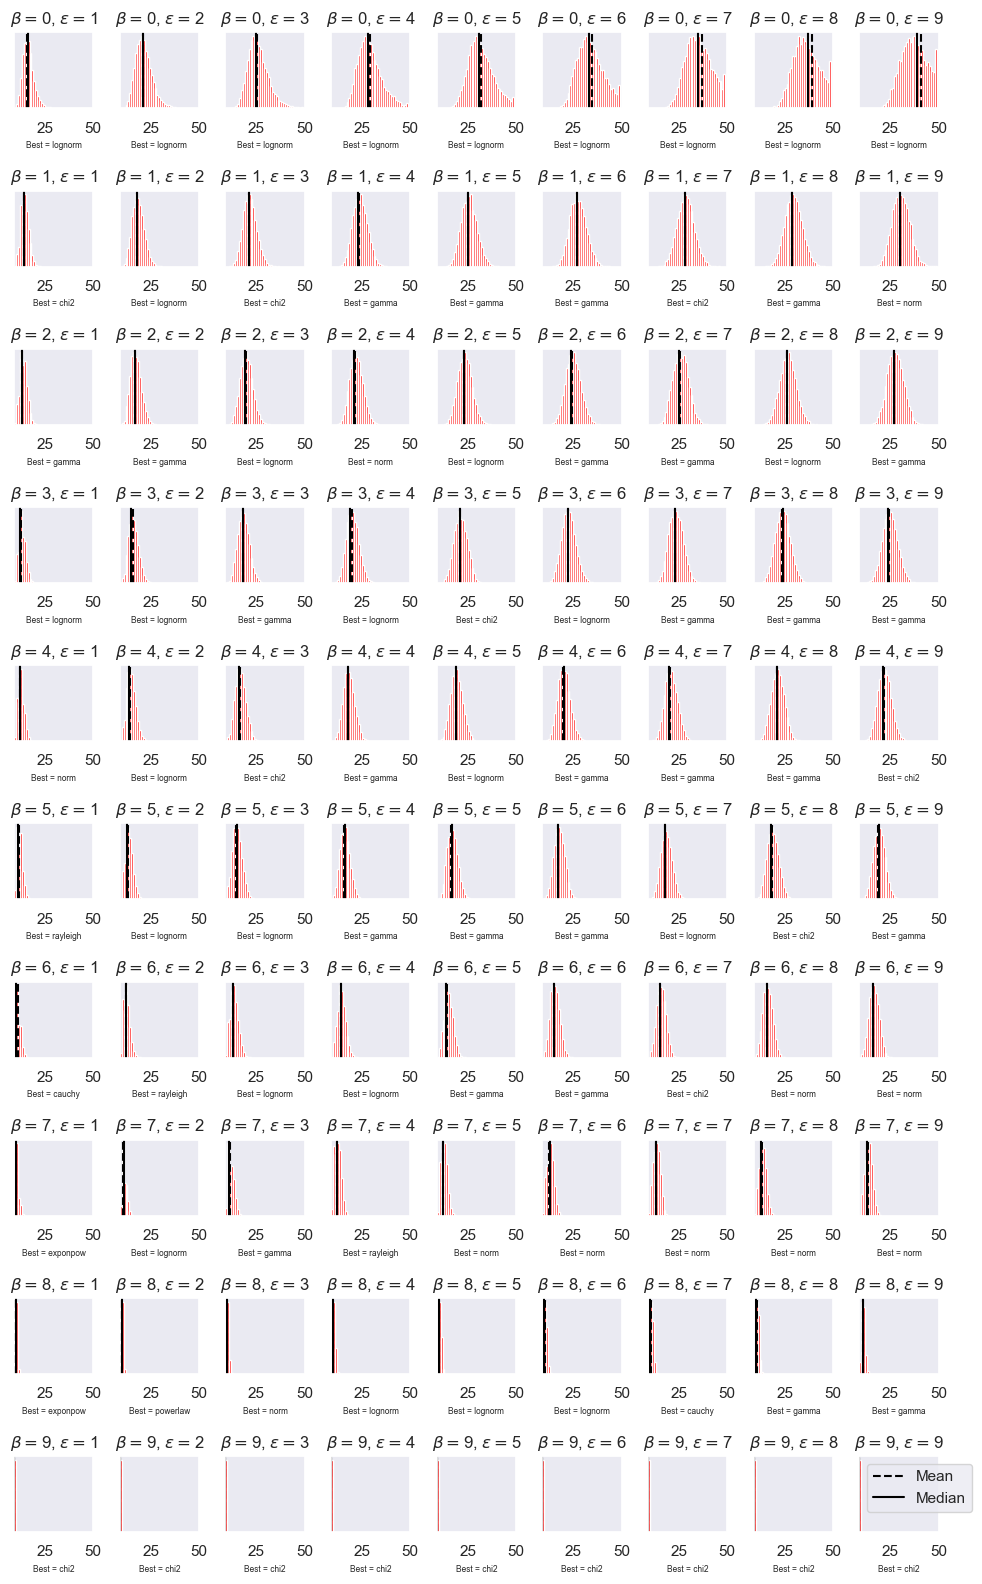

In [104]:
sns.set_style("dark")
#sns.set_style("ticks")

xmin = 9
xmax = 50
num_rows = len(epsilon_list) - stronger_e

fig, ax = plt.subplots(len(beta_list), len(epsilon_list), figsize=(10,num_rows*2))

sim_lengths = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

handicap_list = ['spot_point_heuristic','spot_point_optimal','dynamic_credits']

row = 0 

for epsilon_index in range(len(epsilon_list)):

    epsilon = epsilon_list[epsilon_index]

    for beta in beta_list:
        
            data1 = [len(x)-1 for x in dist_paths[epsilon][beta]]
            #color1 = color_map_color(e1, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
            color1='red'

            # Plot baseline 
            ax[beta,epsilon_index].hist(np.array(data1),color='red',bins=list(range(9,50)))
            ax[beta,epsilon_index].axvline(statistics.mean(data1),color='black',linestyle='dashed')
            ax[beta,epsilon_index].axvline(statistics.median(data1),color='black')

            f = Fitter(data1,distributions=get_common_distributions())
            f.fit()
            name = list(f.get_best().keys())[0]

            ax[beta,epsilon_index].set_xlim((xmin,xmax))
            ax[beta,epsilon_index].title.set_text(fr'$\beta=${beta}, $\epsilon=${epsilon}')
            ax[beta,epsilon_index].set_xlabel(f'Best = {name}',fontsize=6)
            ax[beta,epsilon_index].set_yticklabels([])

            plt.legend([f'Mean','Median'])


fig.tight_layout()

Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]


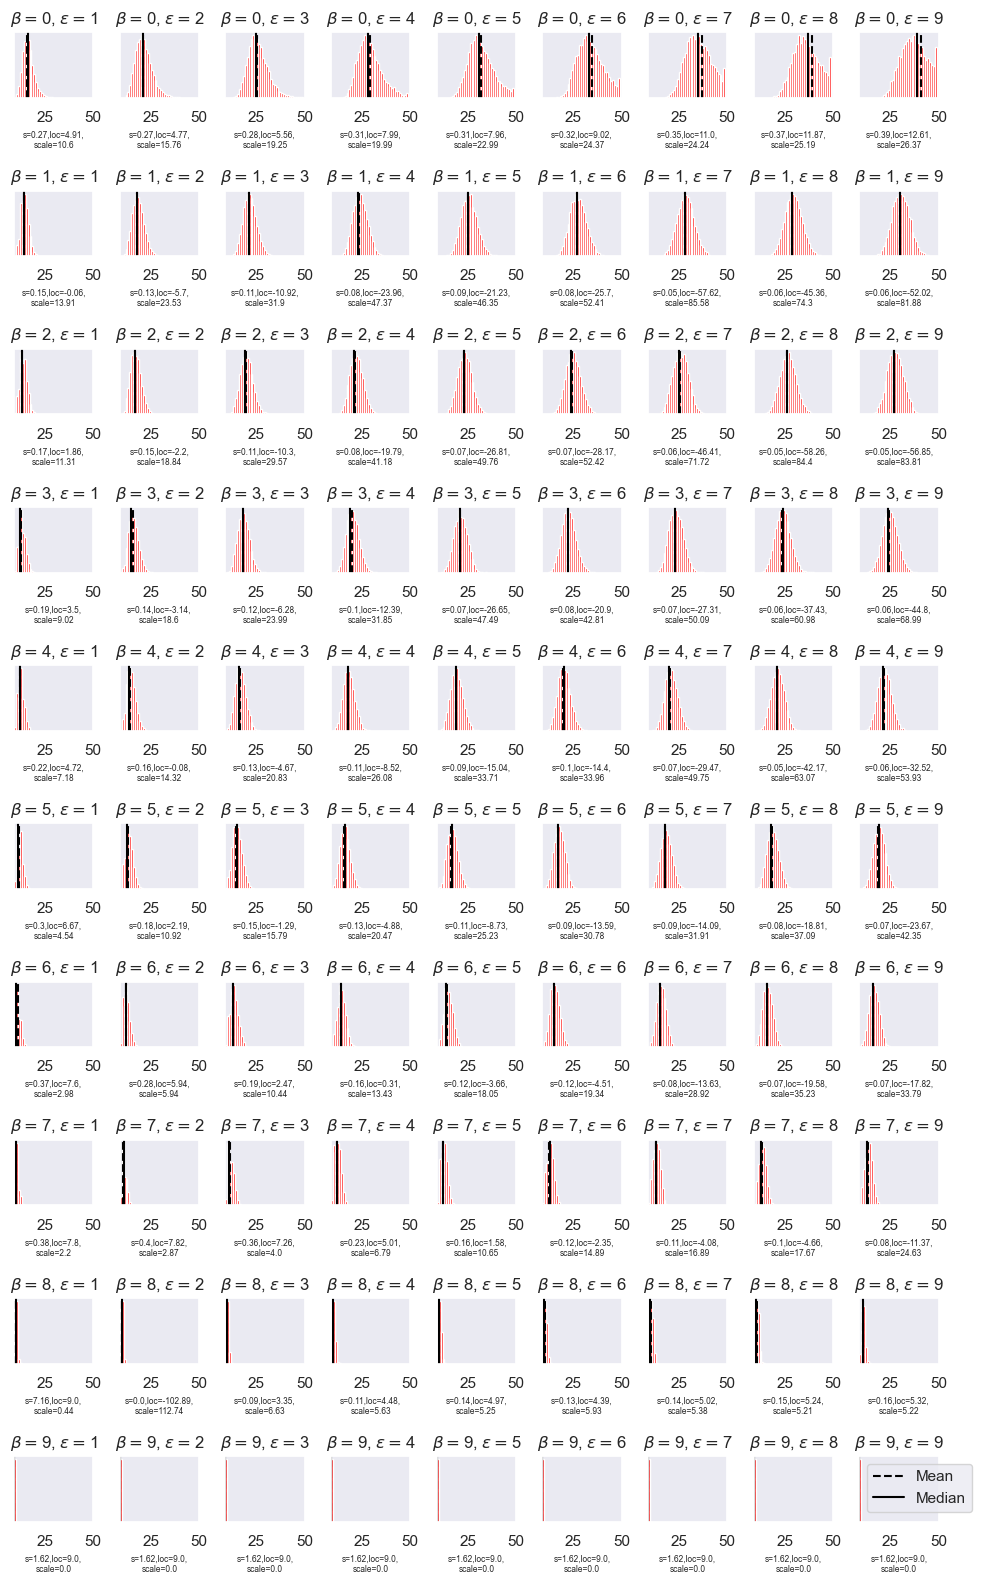

In [107]:
sns.set_style("dark")
#sns.set_style("ticks")

xmin = 9
xmax = 50
num_rows = len(epsilon_list) - stronger_e

fig, ax = plt.subplots(len(beta_list), len(epsilon_list), figsize=(10,num_rows*2))

sim_lengths = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

handicap_list = ['spot_point_heuristic','spot_point_optimal','dynamic_credits']

row = 0 

for epsilon_index in range(len(epsilon_list)):

    epsilon = epsilon_list[epsilon_index]

    for beta in beta_list:
        
            data1 = [len(x)-1 for x in dist_paths[epsilon][beta]]
            #color1 = color_map_color(e1, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
            color1='red'

            # Plot baseline 
            ax[beta,epsilon_index].hist(np.array(data1),color='red',bins=list(range(9,50)))
            ax[beta,epsilon_index].axvline(statistics.mean(data1),color='black',linestyle='dashed')
            ax[beta,epsilon_index].axvline(statistics.median(data1),color='black')

            f = Fitter(data1,distributions=['lognorm'])#get_common_distributions())
            f.fit()
            name = list(f.get_best().keys())[0]
            p_s = round(f.get_best()['lognorm']['s'],2)
            p_loc = round(f.get_best()['lognorm']['loc'],2)
            p_scale = round(f.get_best()['lognorm']['scale'],2)

            ax[beta,epsilon_index].set_xlim((xmin,xmax))
            ax[beta,epsilon_index].title.set_text(fr'$\beta=${beta}, $\epsilon=${epsilon}')
            ax[beta,epsilon_index].set_xlabel(f'Best = {name}',fontsize=6)
            ax[beta,epsilon_index].set_xlabel(f's={p_s},loc={p_loc},\nscale={p_scale}',fontsize=6)
            ax[beta,epsilon_index].set_yticklabels([])

            plt.legend([f'Mean','Median'])


fig.tight_layout()

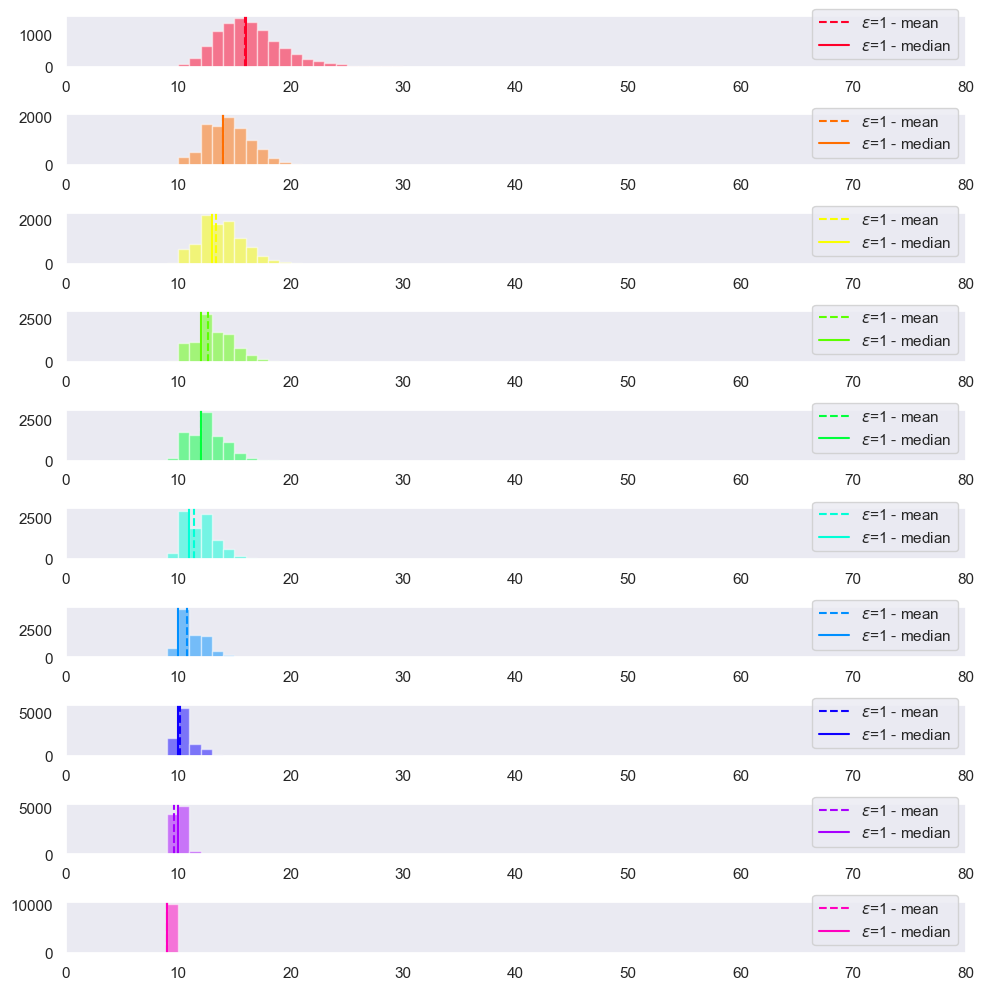

In [112]:
xmin=0
xmax=80

fig, ax = plt.subplots(10, figsize=(10,10))

vmax=max(beta_list)
vmin=min(beta_list)

handicap_list = ['spot_point_heuristic','spot_point_optimal','dynamic_credits']

row = 0 

e1=1

for beta in beta_list:

    # Extract data and colors 
    data1 = [len(x)-1 for x in dist_paths[e1][beta] ]
    color1 = color_map_color(beta, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

    # Plot baseline 
    ax[row].hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(1,80)))
    ax[row].axvline(statistics.mean(data1),color=color1,linestyle='dashed')
    ax[row].axvline(statistics.median(data1),color=color1)
        
    ax[row].set_xlim((xmin,xmax))

    ax[row].legend([f'$\epsilon$={e1} - mean',f'$\epsilon$={e1} - median'])

    row = row + 1 

# fig.suptitle(f"Distributions for stronger player with $\epsilon$= {e1}")
# ax[0,0].title.set_text('No Handicap')
# ax[0,1].title.set_text('Hueristic Spot Point')
# ax[0,2].title.set_text('Optimized Spot Point')
# ax[0,3].title.set_text('Dynamic Credits')
fig.tight_layout()

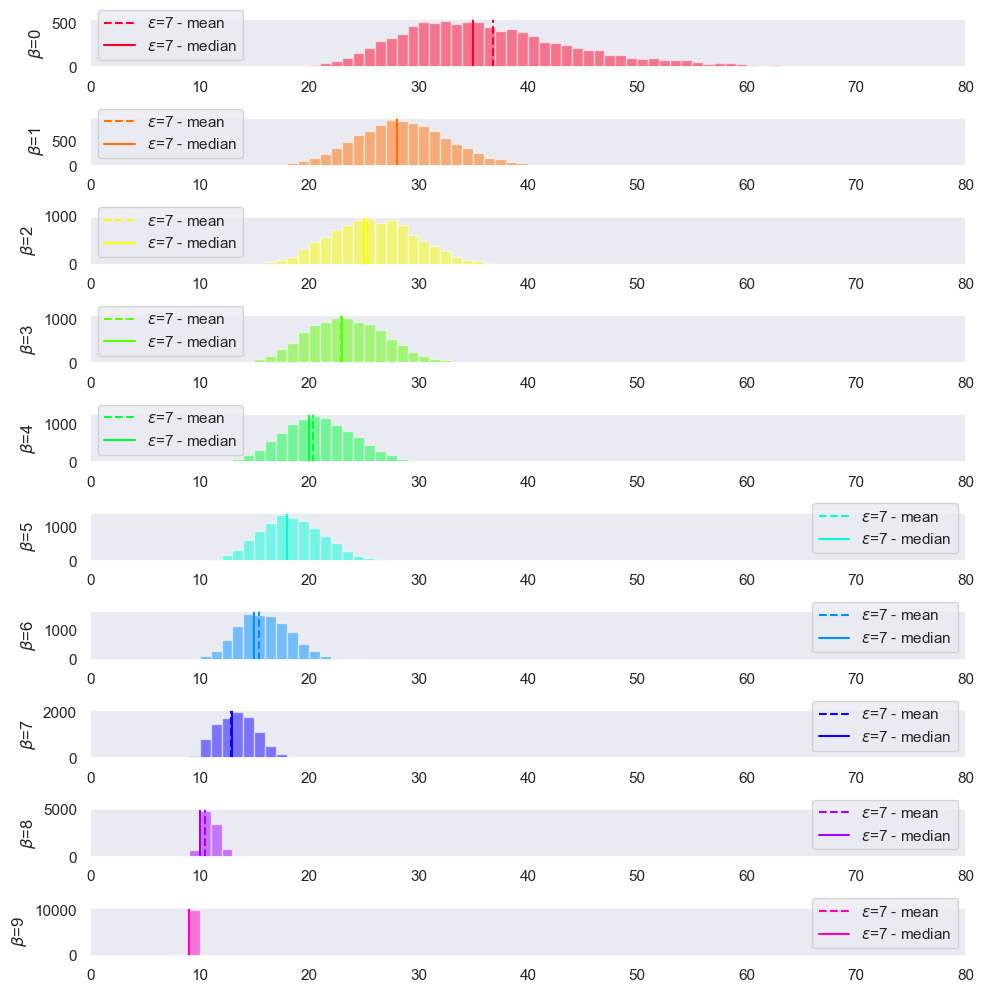

In [168]:
xmin=0
xmax=80

fig, ax = plt.subplots(10, figsize=(10,10))

vmax=max(beta_list)
vmin=min(beta_list)

handicap_list = ['spot_point_heuristic','spot_point_optimal','dynamic_credits']

row = 0 

e1=7

for beta in beta_list:

    # Extract data and colors 
    data1 = [len(x)-1 for x in dist_paths[e1][beta] ]
    color1 = color_map_color(beta, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

    # Plot baseline 
    ax[row].hist(np.array(data1),color=color1,alpha=0.5,bins=list(range(1,80)))
    ax[row].axvline(statistics.mean(data1),color=color1,linestyle='dashed')
    ax[row].axvline(statistics.median(data1),color=color1)
    ax[row].set_ylabel(fr'$\beta$={beta}')
    ax[row].set_xlim((xmin,xmax))

    ax[row].legend([f'$\epsilon$={e1} - mean',f'$\epsilon$={e1} - median'])

    row = row + 1 

# fig.suptitle(f"Distributions for stronger player with $\epsilon$= {e1}")
# ax[0,0].title.set_text('No Handicap')
# ax[0,1].title.set_text('Hueristic Spot Point')
# ax[0,2].title.set_text('Optimized Spot Point')
# ax[0,3].title.set_text('Dynamic Credits')
fig.tight_layout()

/var/folders/jj/jcq76kp53_zchkx8b5cvhdsh0000gn/T/ipykernel_38942/3668338385.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1, hist=True, kde=True,


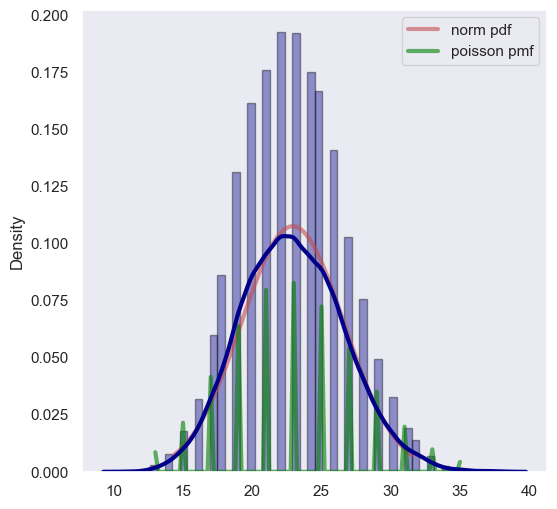

In [169]:
e1=7
beta=3
data1 = [len(x)-1 for x in dist_paths[e1][beta] ]
# f = Fitter(data1,distributions=['norm','lognrom','gamma'])
# f.fit()
# #name = list(f.get_best().keys())[0]
# print(f.get_best())

# f.summary()

from scipy.stats import norm, lognorm, gamma, poisson

norm_params = norm.fit(data1)

fig, ax = plt.subplots(1, 1)
rv = norm.rvs(loc=norm_params[0],scale=norm_params[1])
x = np.linspace(norm.ppf(0.01,loc=norm_params[0],scale=norm_params[1]),
                norm.ppf(0.99,loc=norm_params[0],scale=norm_params[1]), 100)
y = np.linspace(poisson.ppf(0.01,mu=norm_params[0]),
                poisson.ppf(0.99,mu=norm_params[0]), 100)
ax.plot(x, norm.pdf(x,loc=norm_params[0],scale=norm_params[1]),
       'r-', lw=3, alpha=0.6, label='norm pdf')
ax.plot(y, poisson.pmf(y,mu=norm_params[0]),
       'green', lw=3, alpha=0.6, label='poisson pmf')

sns.distplot(data1, hist=True, kde=True, 
             #bins=int(180/5),
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3},ax=ax)

plt.legend()

In [ ]:
for epsilon_index in range(len(epsilon_list)):

    epsilon = epsilon_list[epsilon_index]

    for beta in beta_list:
        
            data1 = [len(x)-1 for x in dist_paths[epsilon][beta]]

            f = Fitter(data1,distributions=['lognorm'])#get_common_distributions())
            f.fit()
            name = list(f.get_best().keys())[0]
            p_s = round(f.get_best()['lognorm']['s'],2)
            p_loc = round(f.get_best()['lognorm']['loc'],2)
            p_scale = round(f.get_best()['lognorm']['scale'],2)





In [196]:
from scipy.stats import kstest

beta=0

for epsilon in epsilon_list:

    data1=[len(x)-1 for x in dist_paths[epsilon][beta]]

    lognorm_params = lognorm.fit(data1)

    x = np.linspace(lognorm.ppf(0.01,s=lognorm_params[0],loc=lognorm_params[1],scale=lognorm_params[2]),
                    lognorm.ppf(0.99,s=lognorm_params[0],loc=lognorm_params[1],scale=lognorm_params[2]), 100)

    print(epsilon,kstest(data1,lognorm.cdf(x,s=lognorm_params[0],loc=lognorm_params[1],scale=lognorm_params[2])))


1 KstestResult(statistic=1.0, pvalue=1.1283555904379908e-242)
2 KstestResult(statistic=1.0, pvalue=1.1283555904379908e-242)
3 KstestResult(statistic=1.0, pvalue=1.1283555904379908e-242)
4 KstestResult(statistic=1.0, pvalue=1.1283555904379908e-242)
5 KstestResult(statistic=1.0, pvalue=1.1283555904379908e-242)
6 KstestResult(statistic=1.0, pvalue=1.1283555904379908e-242)
7 KstestResult(statistic=1.0, pvalue=1.1283555904379908e-242)
8 KstestResult(statistic=1.0, pvalue=1.1283555904379908e-242)
9 KstestResult(statistic=1.0, pvalue=1.1283555904379908e-242)


In [200]:
epsilon=1

for beta in [4]:

    data1=[len(x)-1 for x in dist_paths[epsilon][beta]]

    norm_params = norm.fit(data1)

    x = np.linspace(norm.ppf(0.01,loc=norm_params[0],scale=norm_params[1]),
                    norm.ppf(0.99,loc=norm_params[0],scale=norm_params[1]), 100)

    print(beta,kstest(data1,norm.cdf(x,loc=norm_params[0],scale=norm_params[1])))


4 KstestResult(statistic=1.0, pvalue=1.1283555904379908e-242)


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00, 78.97it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,16.949682,746.083044,-63782.492256,inf,0.174465,1.136822e-266


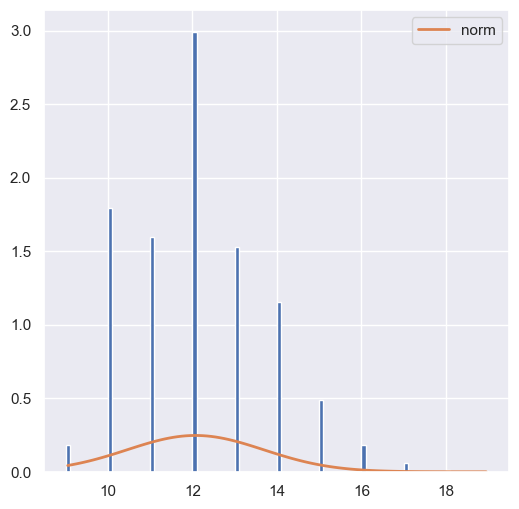

In [201]:
f = Fitter(data1,distributions=['norm'])
f.fit()
#name = list(f.get_best().keys())[0]
f.summary()

In [203]:
from scipy.stats import binom
epsilon=3
beta=3


data1=[len(x)-1 for x in dist_paths[epsilon][beta]]


# norm_params = norm.fit(data1)

x = np.linspace(norm.ppf(0.01,loc=norm_params[0],scale=norm_params[1]),
                norm.ppf(0.99,loc=norm_params[0],scale=norm_params[1]), 100)

# print(beta,kstest(data1,norm.cdf(x,loc=norm_params[0],scale=norm_params[1])))

# 4.0 Win Proportions

## 4.1 Spot Point Heuristic

In [38]:
epsilon1=1
epsilon0=2

spot_points0 = handicap.get_spot_point_heuristic_handicap(epsilon1,epsilon0)

sim1 = Simulator(player_num=player_num,epsilon=epsilon1)
sim1_paths = run_simulation(sim1, iterations, (501,0))

sim0 = Simulator(player_num=player_num,epsilon=epsilon0)
sim0_paths = run_simulation(sim1, iterations, (501-spot_points0,0) )

load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 4.559s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 3.557s.


In [45]:
sim1_len = [len(x) for x in sim1_paths]
sim0_len = [len(x) for x in sim0_paths]

stronger_wins = [1 for x in range(len(sim1_len)) if sim1_len[x] > sim0_len[x]]
sum(stronger_wins) / len(sim1_len)

0.7848

In [53]:
## Run Simulation 

# Initialize Parameters 

iterations = 10000

tokens1 = 0
tokens0 = 0

starting_score = 501

spot_points1=0
spot_points0=0

spot_darts1=0
spot_darts0=0

outcomes_sp_baseline = []


for epsilon1 in epsilon_list:
    
    for epsilon0 in epsilon_list:

        if epsilon1<=epsilon0:

            spot_points0 = handicap.get_spot_point_heuristic_handicap(epsilon1,epsilon0)

            sim1 = Simulator(player_num=player_num,epsilon=epsilon1)
            sim1_paths = run_simulation(sim1, iterations, (501,0))

            sim0 = Simulator(player_num=player_num,epsilon=epsilon0)
            sim0_paths = run_simulation(sim0, iterations, (501-spot_points0,0) )
        
            starter = 0 

            for iter in range(iterations):

                # get the number of throwws 
                turn_path1 = sim1_paths[iter]
                turn_path0 = sim0_paths[iter]
                turns1 = len(turn_path1)
                turns0 = len(turn_path0)

                # declare the winner 
                if turns1 < turns0: 
                    winner = 1
                elif turns1 > turns0:
                    winner = 0
                elif turns1 == turns0:
                    winner = starter 
                
                # update starter so that they take turns
                if starter == 1:
                    starter = 0
                else:
                    starter =1 
                
                outcomes_sp_baseline.append([player_num,epsilon1,epsilon0,tokens1,tokens0,spot_points1,spot_points0,spot_darts1,spot_darts0,iter,winner])



load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 4.551s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 5.007s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 4.388s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 4.72

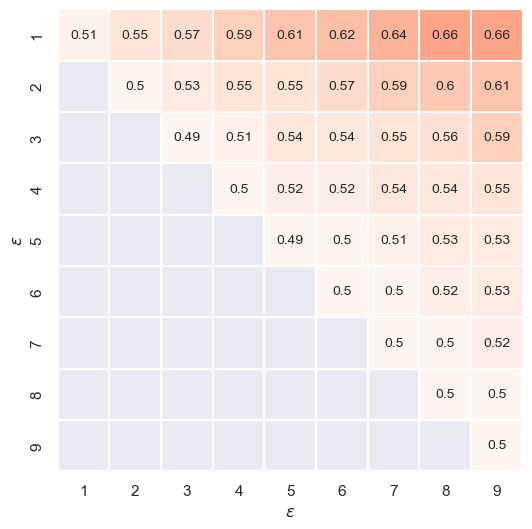

In [59]:
col_names = ['player','epsilon_strong','epsilon_weak','tokens_strong','tokens_weak','spot_points_strong','spot_points_weak','spot_darts_strong','spot_darts_weak','game_id','winner_strong']
df_sp_baseline_results = pd.DataFrame(data=outcomes_sp_baseline,columns=col_names)

df_sp_baseline_results = df_sp_baseline_results.groupby(['epsilon_strong','epsilon_weak']).mean('winner_strong')['winner_strong'].reset_index()
df_sp_baseline_results = df_sp_baseline_results.round(2)

df_sp_baseline_results_graph = df_sp_baseline_results.pivot(columns='epsilon_weak',index='epsilon_strong',values='winner_strong')

fig = sns.set(rc={'figure.figsize':(6,6)})
fig = sns.heatmap(df_sp_baseline_results_graph,annot=True,annot_kws={"size": 10},fmt="",cmap='Reds',linewidths=0.30,cbar=False,vmin=0.5,vmax=1)
#fig = plt.title("Difference in expected throws using spot point handicap system")
fig = plt.xlabel(r'$\epsilon$')
fig = plt.ylabel(r'$\epsilon$')

## 4.2 Optimized Spot Point

In [55]:
## Run Simulation 

# Initialize Parameters 

iterations = 10000

tokens1 = 0
tokens0 = 0

starting_score = 501

spot_points1=0
spot_points0=0

spot_darts1=0
spot_darts0=0

outcomes_sp_optimized = []


for epsilon1 in epsilon_list:
    
    for epsilon0 in epsilon_list:

        if epsilon1<=epsilon0:

            spot_points0 = handicap.get_spot_point_optimal_handicap(epsilon1,epsilon0)

            sim1 = Simulator(player_num=player_num,epsilon=epsilon1)
            sim1_paths = run_simulation(sim1, iterations, (501,0))

            sim0 = Simulator(player_num=player_num,epsilon=epsilon0)
            sim0_paths = run_simulation(sim0, iterations, (501-spot_points0,0) )
        
            starter = 0 

            for iter in range(iterations):

                # get the number of throwws 
                turn_path1 = sim1_paths[iter]
                turn_path0 = sim0_paths[iter]
                turns1 = len(turn_path1)
                turns0 = len(turn_path0)

                # declare the winner 
                if turns1 < turns0: 
                    winner = 1
                elif turns1 > turns0:
                    winner = 0
                elif turns1 == turns0:
                    winner = starter 
                
                # update starter so that they take turns
                if starter == 1:
                    starter = 0
                else:
                    starter =1 
                
                outcomes_sp_optimized.append([player_num,epsilon1,epsilon0,tokens1,tokens0,spot_points1,spot_points0,spot_darts1,spot_darts0,iter,winner])



load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 4.439s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 4.406s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 4.412s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 4.37

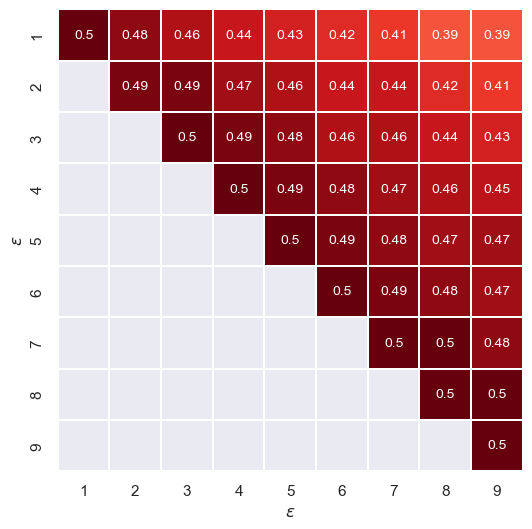

In [65]:
col_names = ['player','epsilon_strong','epsilon_weak','tokens_strong','tokens_weak','spot_points_strong','spot_points_weak','spot_darts_strong','spot_darts_weak','game_id','winner_strong']
df_sp_optimized_results = pd.DataFrame(data=outcomes_sp_optimized,columns=col_names)

df_sp_optimized_results = df_sp_optimized_results.groupby(['epsilon_strong','epsilon_weak']).mean('winner_strong')['winner_strong'].reset_index()
df_sp_optimized_results = df_sp_optimized_results.round(2)

df_sp_optimized_results_graph = df_sp_optimized_results.pivot(columns='epsilon_weak',index='epsilon_strong',values='winner_strong')

fig = sns.set(rc={'figure.figsize':(6,6)})
fig = sns.heatmap(df_sp_optimized_results_graph,annot=True,annot_kws={"size": 10},fmt="",cmap='Reds',linewidths=0.30,cbar=False,vmin=0.25,vmax=0.5)
#fig = plt.title("Difference in expected throws using spot point handicap system")
fig = plt.xlabel(r'$\epsilon$')
fig = plt.ylabel(r'$\epsilon$')

## 4.3 Dynamic Credits

In [67]:
## Run Simulation 

# Initialize Parameters 

iterations = 10000

tokens1 = 0
tokens0 = 0

starting_score = 501

spot_points1=0
spot_points0=0

spot_darts1=0
spot_darts0=0

outcomes_dynamic_credits = []


for epsilon1 in epsilon_list:
    
    for epsilon0 in epsilon_list:

        if epsilon1<=epsilon0:

            credits, credits_lower, credits_higher, threshold_higher_multiplier = handicap.get_dynamic_credits_handicap(epsilon1,epsilon0)
            threshold_higher = int(round(iterations * threshold_higher_multiplier))

            sim1 = Simulator(player_num=player_num,epsilon=epsilon1)
            sim1_paths = run_simulation(sim1, iterations, (501,0))

            sim0 = Simulator(player_num=player_num,epsilon=epsilon0)
            sim0_paths = run_simulation(sim0, threshold_higher, (501,credits_higher) )
            sim0_paths.extend(run_simulation(sim0,iterations-threshold_higher,(501,credits_lower)))
        
            starter = 0 

            for iter in range(iterations):

                # get the number of throwws 
                turn_path1 = sim1_paths[iter]
                turn_path0 = sim0_paths[iter]
                turns1 = len(turn_path1)
                turns0 = len(turn_path0)

                # declare the winner 
                if turns1 < turns0: 
                    winner = 1
                elif turns1 > turns0:
                    winner = 0
                elif turns1 == turns0:
                    winner = starter 
                
                # update starter so that they take turns
                if starter == 1:
                    starter = 0
                else:
                    starter =1 
                
                outcomes_dynamic_credits.append([player_num,epsilon1,epsilon0,tokens1,tokens0,spot_points1,spot_points0,spot_darts1,spot_darts0,iter,winner])



load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 4.683s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.000s.
Ran in 4.442s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 4.496s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.

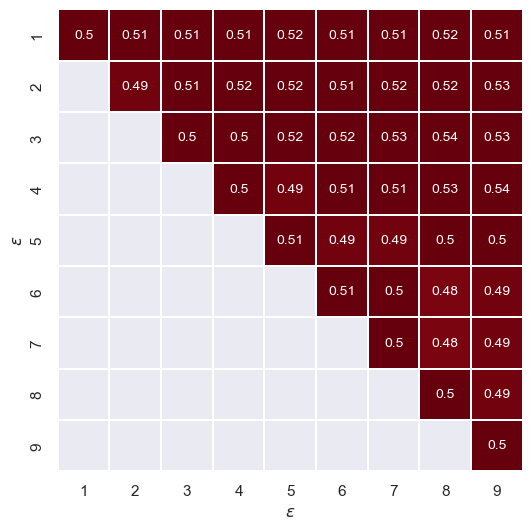

In [68]:
col_names = ['player','epsilon_strong','epsilon_weak','tokens_strong','tokens_weak','spot_points_strong','spot_points_weak','spot_darts_strong','spot_darts_weak','game_id','winner_strong']
df_dynamic_credits_results = pd.DataFrame(data=outcomes_dynamic_credits,columns=col_names)

df_dynamic_credits_results = df_dynamic_credits_results.groupby(['epsilon_strong','epsilon_weak']).mean('winner_strong')['winner_strong'].reset_index()
df_dynamic_credits_results = df_dynamic_credits_results.round(2)

df_dynamic_credits_results_graph = df_dynamic_credits_results.pivot(columns='epsilon_weak',index='epsilon_strong',values='winner_strong')

fig = sns.set(rc={'figure.figsize':(6,6)})
fig = sns.heatmap(df_dynamic_credits_results_graph,annot=True,annot_kws={"size": 10},fmt="",cmap='Reds',linewidths=0.30,cbar=False,vmin=0.5,vmax=1)
#fig = plt.title("Difference in expected throws using spot point handicap system")
fig = plt.xlabel(r'$\epsilon$')
fig = plt.ylabel(r'$\epsilon$')

# 5.0 Plotting Paths


## 5.2 Different Epsilon for Static Token Value

In [12]:
# Initialize Parameters 

iterations = 100
player_num = 10
tokens = 0
epsilon_list = [1,2,3,4,5,6,7,8,9]
starting_state = (501,tokens)

col_names = ['player','epsilon','tokens','game_id','throw_number','state','state_score','state_tokens']
df = pd.DataFrame(columns=col_names)

for epsilon in epsilon_list:
    
    sim = Simulator(player_num=player_num,epsilon=epsilon)
    simulation_paths = run_simulation(sim,iterations,starting_state)
    df = pd.concat([df,build_dataset(simulation_paths,player_num,epsilon,tokens)])
    df = df.reset_index().drop(['index'],axis=1)
    


load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 4.464s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl


KeyboardInterrupt: 

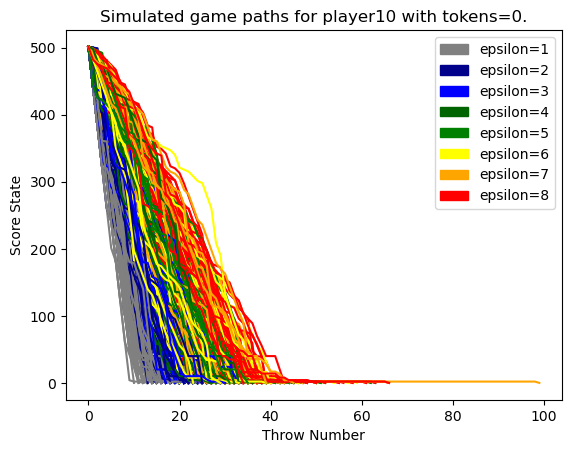

In [ ]:
color_map = {1:'grey',2:'darkblue',3:'blue',4:'darkgreen',5:'green',6:'yellow',7:'orange',8:'red'}

for game in range(iterations):
    for epsilon in epsilon_list:
        df_game = df.loc[df.game_id==game].loc[df.epsilon==epsilon].copy()[['throw_number','state_score']].set_index('throw_number')
        color = color_map[epsilon]
        fig = plt.plot(df_game,color=color)

fig = plt.xlabel('Throw Number')
fig = plt.ylabel('Score State')
fig = plt.title(f"Simulated game paths for player{player_num} with tokens={tokens}.")# and epsilon={epsilon}")

patches = []
for c in color_map:
    patch = mpatches.Patch(color=color_map[c], label=f'epsilon={c}')
    patches.append(patch)

fig = plt.legend(handles=patches)

In [ ]:
# Initialize Parameters 

iterations = 100
player_num = 10
tokens = 1
epsilon_list = [1,2,3,4,5,6,7,8]
starting_state = (501,tokens)

col_names = ['player','epsilon','tokens','game_id','throw_number','state','state_score','state_tokens']
df = pd.DataFrame(columns=col_names)

for epsilon in epsilon_list:
    
    sim = Simulator(player_num=player_num,epsilon=epsilon)
    simulation_paths = run_simulation(iterations,starting_state)
    df = pd.concat([df,build_dataset(simulation_paths,player_num,epsilon,tokens)])
    df = df.reset_index().drop(['index'],axis=1)
    


load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.044s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.065s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e3_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.067s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e4_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.07

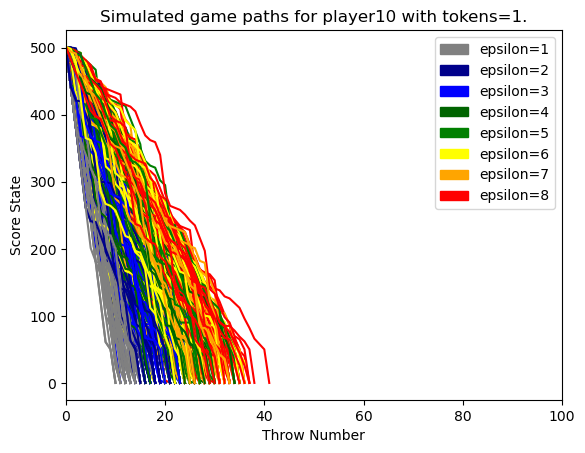

In [ ]:
color_map = {1:'grey',2:'darkblue',3:'blue',4:'darkgreen',5:'green',6:'yellow',7:'orange',8:'red'}

for game in range(iterations):
    for epsilon in epsilon_list:
        df_game = df.loc[df.game_id==game].loc[df.epsilon==epsilon].copy()[['throw_number','state_score']].set_index('throw_number')
        color = color_map[epsilon]
        fig = plt.plot(df_game,color=color)

fig = plt.xlabel('Throw Number')
fig = plt.ylabel('Score State')
fig = plt.xlim(0,100)
fig = plt.title(f"Simulated game paths for player{player_num} with tokens={tokens}.")# and epsilon={epsilon}")

patches = []
for c in color_map:
    patch = mpatches.Patch(color=color_map[c], label=f'epsilon={c}')
    patches.append(patch)

fig = plt.legend(handles=patches)

In [ ]:
# Initialize Parameters 

iterations = 100
player_num = 10
tokens = 3
epsilon_list = [1,2,3,4,5,6,7,8]
starting_state = (501,tokens)

col_names = ['player','epsilon','tokens','game_id','throw_number','state','state_score','state_tokens']
df = pd.DataFrame(columns=col_names)

for epsilon in epsilon_list:
    
    sim = Simulator(player_num=player_num,epsilon=epsilon)
    simulation_paths = run_simulation(iterations,starting_state)
    df = pd.concat([df,build_dataset(simulation_paths,player_num,epsilon,tokens)])
    df = df.reset_index().drop(['index'],axis=1)
    


load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.049s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.053s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e3_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.056s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e4_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.06

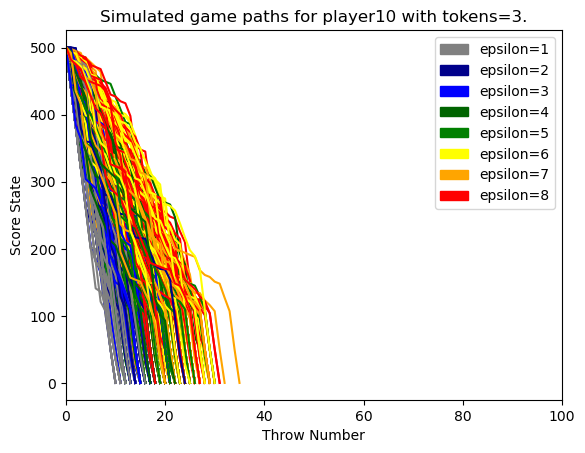

In [ ]:
color_map = {1:'grey',2:'darkblue',3:'blue',4:'darkgreen',5:'green',6:'yellow',7:'orange',8:'red'}

for game in range(iterations):
    for epsilon in epsilon_list:
        df_game = df.loc[df.game_id==game].loc[df.epsilon==epsilon].copy()[['throw_number','state_score']].set_index('throw_number')
        color = color_map[epsilon]
        fig = plt.plot(df_game,color=color)

fig = plt.xlabel('Throw Number')
fig = plt.ylabel('Score State')
fig = plt.xlim(0,100)
fig = plt.title(f"Simulated game paths for player{player_num} with tokens={tokens}.")# and epsilon={epsilon}")

patches = []
for c in color_map:
    patch = mpatches.Patch(color=color_map[c], label=f'epsilon={c}')
    patches.append(patch)

fig = plt.legend(handles=patches)

In [ ]:
# Initialize Parameters 

iterations = 100
player_num = 10
tokens = 7
epsilon_list = [1,2,3,4,5,6,7,8]
starting_state = (501,tokens)

col_names = ['player','epsilon','tokens','game_id','throw_number','state','state_score','state_tokens']
df = pd.DataFrame(columns=col_names)

for epsilon in epsilon_list:
    
    sim = Simulator(player_num=player_num,epsilon=epsilon)
    simulation_paths = run_simulation(iterations,starting_state)
    df = pd.concat([df,build_dataset(simulation_paths,player_num,epsilon,tokens)])
    df = df.reset_index().drop(['index'],axis=1)
    


load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.035s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.034s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e3_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.038s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e4_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.03

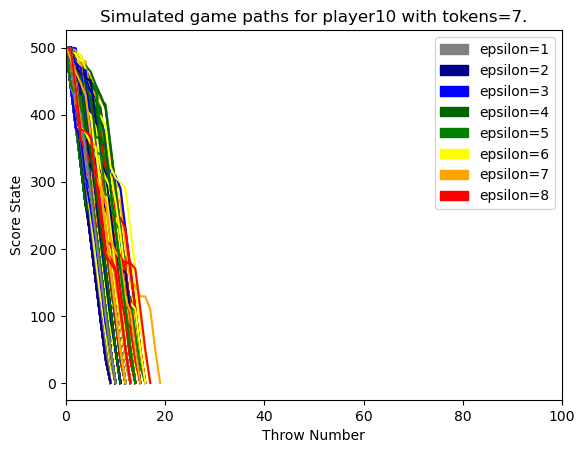

In [ ]:
color_map = {1:'grey',2:'darkblue',3:'blue',4:'darkgreen',5:'green',6:'yellow',7:'orange',8:'red'}

for game in range(iterations):
    for epsilon in epsilon_list:
        df_game = df.loc[df.game_id==game].loc[df.epsilon==epsilon].copy()[['throw_number','state_score']].set_index('throw_number')
        color = color_map[epsilon]
        fig = plt.plot(df_game,color=color)

fig = plt.xlabel('Throw Number')
fig = plt.ylabel('Score State')
fig = plt.xlim(0,100)
fig = plt.title(f"Simulated game paths for player{player_num} with tokens={tokens}.")# and epsilon={epsilon}")

patches = []
for c in color_map:
    patch = mpatches.Patch(color=color_map[c], label=f'epsilon={c}')
    patches.append(patch)

fig = plt.legend(handles=patches)

## 5.2 Static Epsilon for Different Token Values

In [ ]:
# Initialize Parameters 

iterations = 100
player_num = 10
token_list = [0,1,2,3,4,5,6,7,8,9]
epsilon = 1


col_names = ['player','epsilon','tokens','game_id','throw_number','state','state_score','state_tokens']
df = pd.DataFrame(columns=col_names)

for token in token_list: 
    starting_state = (501,token)
    sim = Simulator(player_num=player_num,epsilon=epsilon)
    simulation_paths = run_simulation(iterations,starting_state)
    df = pd.concat([df,build_dataset(simulation_paths,player_num,epsilon,token)])
    df = df.reset_index().drop(['index'],axis=1)
        


load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.048s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.041s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.041s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.03

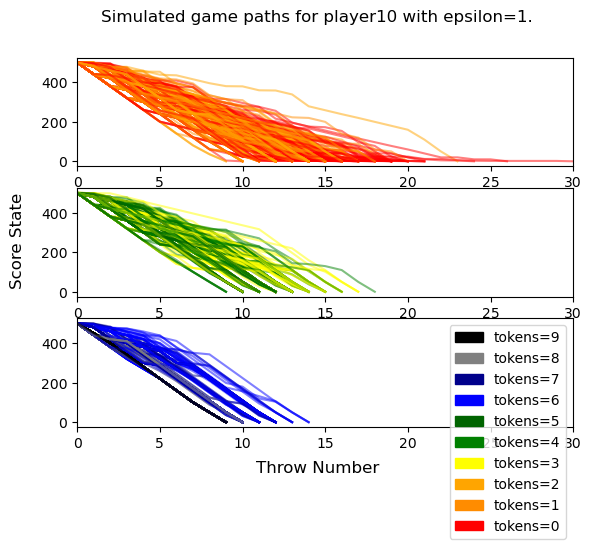

In [ ]:
color_map = {9:'black',8:'grey',7:'darkblue',6:'blue',5:'darkgreen',4:'green',3:'yellow',2:'orange',1:'darkorange',0:'red'}

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
#fig.suptitle('Horizontally stacked subplots')


for game in range(iterations):
    for token in token_list:
        if token in [6,7,8,9]:
            df_game = df.loc[df.game_id==game].loc[df.tokens==token].copy()[['throw_number','state_score']].set_index('throw_number')
            color = color_map[token]
            ax3.plot(df_game,color=color,alpha=0.5)
        if token in [5,4,3]:
            df_game = df.loc[df.game_id==game].loc[df.tokens==token].copy()[['throw_number','state_score']].set_index('throw_number')
            color = color_map[token]
            ax2.plot(df_game,color=color,alpha=0.5)
        if token in [2,1,0]:
            df_game = df.loc[df.game_id==game].loc[df.tokens==token].copy()[['throw_number','state_score']].set_index('throw_number')
            color = color_map[token]
            ax1.plot(df_game,color=color,alpha=0.5)


ax1.set_xlim(0,30) 
ax2.set_xlim(0,30) 
ax3.set_xlim(0,30) 

fig.supxlabel('Throw Number')
fig.supylabel('Score State')
fig.suptitle(f"Simulated game paths for player{player_num} with epsilon={epsilon}.")# and epsilon={epsilon}")

patches = []
for c in color_map:
    patch = mpatches.Patch(color=color_map[c], label=f'tokens={c}')
    patches.append(patch)

fig = plt.legend(handles=patches)

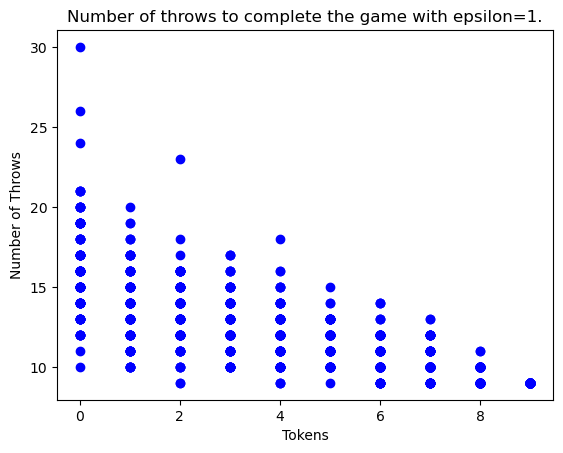

In [ ]:
df_throws = df.groupby(['tokens','game_id']).max()['throw_number'].reset_index()
fig = plt.scatter(df_throws.tokens,df_throws.throw_number,c='b')

fig = plt.xlabel('Tokens')
fig = plt.ylabel('Number of Throws')
fig = plt.title(f"Number of throws to complete the game with epsilon={epsilon}.")# and epsilon={epsilon}")

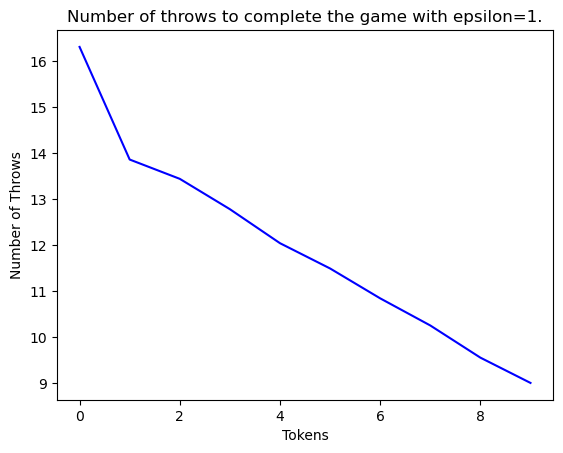

In [ ]:
df_throws = df.groupby(['tokens','game_id']).max()['throw_number'].reset_index().groupby('tokens').mean()['throw_number']
fig = plt.plot(df_throws,color='blue')
#df_throws
fig = plt.xlabel('Tokens')
fig = plt.ylabel('Number of Throws')
fig = plt.title(f"Number of throws to complete the game with epsilon={epsilon}.")# and epsilon={epsilon}")